In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [ ]:
# save viz template
title=
name=
sns.set_context("paper")

plot = ## .set_title(title)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

## MAIN RESULTS: reward vs difficulty

In [50]:
data = pd.read_csv("test_data/test_data.csv")
data

,problem,reward,model,seed,set
0,101,1.000000,stepbonus_8,10,shifts_easy_ratio_mixed
1,202,1.000000,stepbonus_8,10,shifts_easy_ratio_mixed
2,303,1.000000,stepbonus_8,10,shifts_easy_ratio_mixed
3,404,1.000000,stepbonus_8,10,shifts_easy_ratio_mixed
4,505,1.000000,stepbonus_8,10,shifts_easy_ratio_mixed
...,...,...,...,...,...
7995,4646,0.428571,random_0,91,shifts_extrahard_ratio_above
7996,4747,0.476190,random_0,91,shifts_extrahard_ratio_above
7997,4848,0.388889,random_0,91,shifts_extrahard_ratio_above
7998,4949,0.431818,random_0,91,shifts_extrahard_ratio_above


In [52]:
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])

0       mixed
1       mixed
2       mixed
3       mixed
4       mixed
        ...  
7995    above
7996    above
7997    above
7998    above
7999    above
Name: set, Length: 8000, dtype: object

In [106]:
def AverageRewardvsProblemComplexityData(data):
    data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
    #data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
    data.drop(['model'],axis=1,inplace=True)

    #data = data[data['reward_function']=='step']

    data.reward_function = data.reward_function.str.title()
    data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)
    data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size']

    conditions = [data['set'] == 'shifts_easy_ratio_mixed',              
                data['set'] == 'shifts_medium_ratio_mixed',              
                data['set'] == 'shifts_hard_ratio_mixed',
                data['set'] == 'shifts_extrahard_ratio_mixed',
                data['set'] == 'shifts_easy_ratio_above',
                data['set'] == 'shifts_medium_ratio_above',
                data['set'] == 'shifts_hard_ratio_above',
                data['set'] == 'shifts_extrahard_ratio_above',
            ]
    outputs = [1,2,3,4,5,6,7,8]
    #outputs = ['Max Shifts 8',]
    X = np.select(conditions, outputs, 'Other')
    data['Problem Complexity'] = X

    hmm = data.groupby(['Reward Function','Problem Complexity']).agg({
                                        'Reward':'mean'
                                        }).reset_index()

    return hmm

In [113]:
data = pd.read_csv("test_data/test_data.csv")

data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='mixed']

ARvPC_data = AverageRewardvsProblemComplexityData(data)
#ARvPC_data.head()

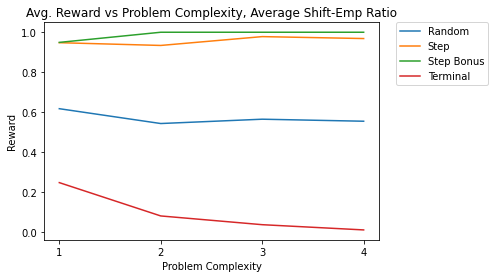

In [116]:
title = 'Avg. Reward vs Problem Complexity, Average Shift-Emp Ratio'

sns.lineplot(x="Problem Complexity", y="Reward", hue="Reward Function", data=ARvPC_data).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [117]:
data = pd.read_csv("test_data/test_data.csv")
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='above']

data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)

#data = data[data['reward_function']=='step']

data.reward_function = data.reward_function.str.title()
data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)

data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size']

conditions = [
            data['set'] == 'shifts_easy_ratio_above',
            data['set'] == 'shifts_medium_ratio_above',
            data['set'] == 'shifts_hard_ratio_above',
            data['set'] == 'shifts_extrahard_ratio_above',
        ]
#outputs = [1,2,3,4,5,6,7,8]
#outputs = ['Max shifts 8, avg ratio','Max shifts 14, avg ratio', 'Max shifts 18, avg ratio', 'Max shifts 23, avg ratio', \
#           'Max shifts 8, above avg ratio', 'Max shifts 14, above avg ratio', 'Max shifts 18, above avg ratio',  'Max shifts 23, above avg ratio']
outputs = ['Max 08', 'Max 14','Max 18','Max 23']
X = np.select(conditions, outputs, 'Other')
data['Problem Complexity'] = X

hmm = data.groupby(['Reward Function','Problem Complexity']).agg({
                                    'Reward':'mean'
                                    }).reset_index()



([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

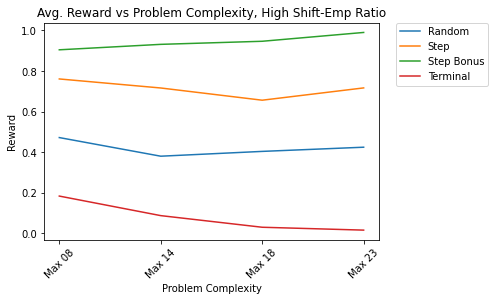

In [118]:
title = 'Avg. Reward vs Problem Complexity, High Shift-Emp Ratio'

sns.lineplot(x="Problem Complexity", y="Reward", hue="Reward Function", data=hmm).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

## % Acceptable 

In [60]:
# plot percentage of problems with reward == 1

## Training data: learning curve

In [40]:
training_data = glob.glob("run_data/*.csv")

In [46]:
reward_function = training_data[0].split('_')[5].split('=')[1]

'Step'

In [41]:
pd.read_csv(training_data[0])

,scores,prob
0,1.000000,"('0037', '0007')"
1,0.714286,"('0026', '0009')"
2,1.000000,"('0026', '0004')"
3,0.857143,"('0045', '0039')"
4,0.857143,"('0020', '0008')"
...,...,...
9994,0.857143,"('0020', '0007')"
9995,1.000000,"('0023', '0033')"
9996,0.714286,"('0048', '0040')"
9997,0.857143,"('0017', '0024')"


## archive ####

In [6]:
piv = hmm.pivot(index='set', columns='reward_function', values=['reward'])
piv.columns = piv.columns.get_level_values(1)

plot_data = piv.reset_index()
plot_data

reward_function,set,step,stepbonus,terminal
0,shifts_easy_ratio_mixed,0.592000,0.938333,-0.046714
1,shifts_hard_ratio_mixed,0.328772,1.000000,-0.428233
2,shifts_medium_ratio_mixed,0.379712,1.000000,-0.340655


In [7]:
erm = plot_data.transpose()

well = erm.rename(columns=erm.iloc[0]).drop(erm.index[0]).reindex(columns = ['shifts_easy_ratio_mixed','shifts_medium_ratio_mixed','shifts_hard_ratio_mixed']).transpose()

well

reward_function,step,stepbonus,terminal
shifts_easy_ratio_mixed,0.592,0.938333,-0.0467143
shifts_medium_ratio_mixed,0.379712,1,-0.340655
shifts_hard_ratio_mixed,0.328772,1,-0.428233


DataError: No numeric types to aggregate

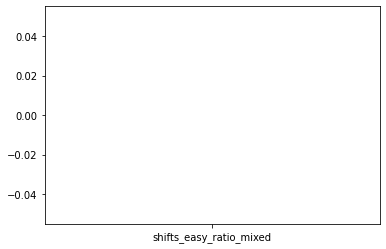

In [8]:
sns.lineplot(data=well)